Inspirado en: https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155
y  https://github.com/SharmaNatasha/Machine-Learning-using-Python

Enseñamos dos técnicas para detectar outliers. También vamos a discutir cuándo quitarlos o no, y nuestra discusión va a estar centrada en que queremos hacer un modelo de regresión para comparar cómo cambian los precios con el número de habitaciones. Como queremos encontrar el mejor modelo, vamos a decidir qué outliers quitar también en base a eso.

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston,load_iris
import scipy as sc
import seaborn as sns
%matplotlib inline

In [2]:
#Load the data
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
#Create dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df['MEDV'] = boston.target

boston_df_o = boston_df.copy()
boston_df.shape

(506, 14)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


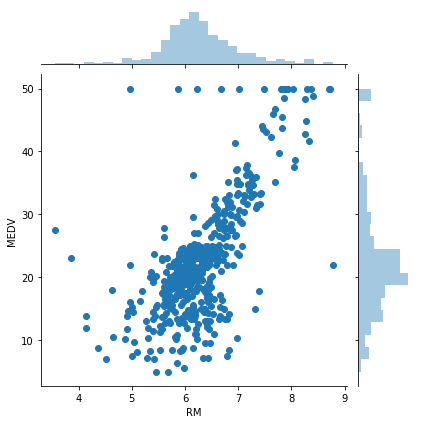

In [6]:
sns.jointplot(x='RM', y='MEDV', data=boston_df)

In [7]:
r = sc.stats.linregress(boston_df['RM'], boston_df['MEDV']).rvalue

In [8]:
print(f'The measure R^2 is {r*r}')

The measure R^2 is 0.48352545599133356


# Z-score
Vamos a quitar outliers en base a la z-score. La idea es normalizar todos los valores en base a la normal, es decir que si $\overline{x}$ es la media muestral y $\sigma$ la desviación estándar, tenemos que para cada punto:
$$\frac{x- \overline{x}}{\sigma}$$ y esos puntos estarán normalizados. 

Ahora, lo que queremos es quitar los puntos que estén muy desviados de la media, los puntos que tengan más de una determinada desviación estándar. En este caso, si quitamos los puntos que tengan z-score > 3, estamos quitando un 0.2% de los puntos, o sea que es una forma de controlar no solo cuáles sino también cuántos puntos quito.

![](z_scores.png)

Creamos z, un array con los valores de z-score para cada punto.

In [9]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [10]:
z.shape


(506, 14)

In [11]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [12]:
print(z[55][1])

3.375038763517294


### Removing the outliers 

In [13]:
boston_df_o = boston_df[(z < 3).all(axis=1)]

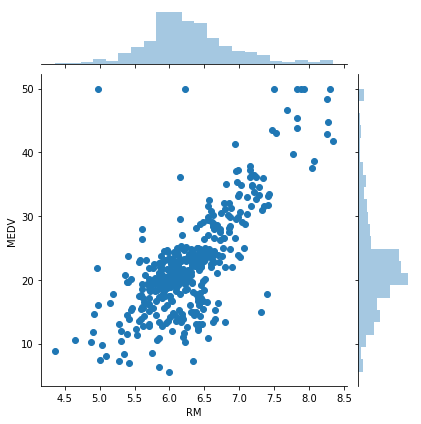

In [14]:
sns.jointplot(x='RM', y='MEDV', data=boston_df_o)


In [15]:
boston_df.shape

(506, 14)

In [16]:
boston_df_o.shape

(415, 14)

In [17]:
r = sc.stats.linregress(boston_df_o['RM'], boston_df_o['MEDV']).rvalue
print(f'The measure R^2 is {r*r}')

The measure R^2 is 0.5388159185567308


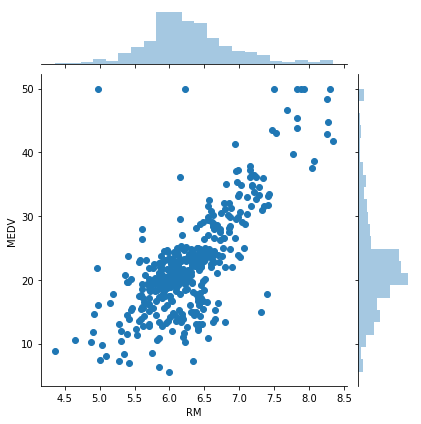

In [18]:
sns.jointplot(x='RM', y='MEDV', data=boston_df_o)


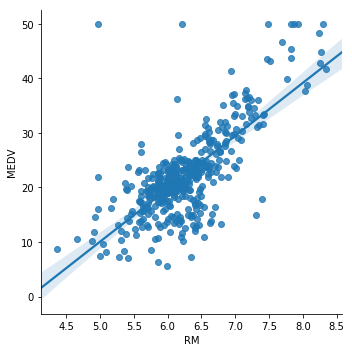

In [19]:
sns.lmplot(x='RM', y='MEDV', data=boston_df_o)


# IQR based outliers

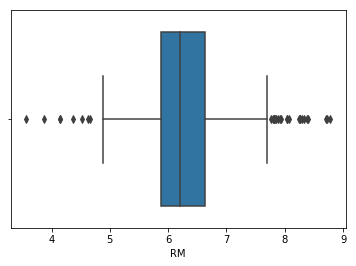

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=boston_df['RM'])

Primero poner threshold = 1.5 para ser más conservadores y enseñar cómo queda el boxplot--> hemos quitado muchos outliers pero si seguimos hacia el modelo, vemos que el R^2 baja mucho, así que quizá hemos quitado outliers que nos dan un buen ajuste.

Probamos hasta que vemos que con threshold = 2.5 entran más outliers pero el ajuste queda mucho mejor. Por qué queda mejor? Cuál es el efecto de los outliers? Siempre es mejor quitarlos?

In [21]:
boston_df_o1 = boston_df.copy()

Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
threshold_IQR = 2.5
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - threshold_IQR * IQR)) |(boston_df_o1 > (Q3 + threshold_IQR * IQR))).any(axis=1)]

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
MEDV         7.975000
dtype: float64


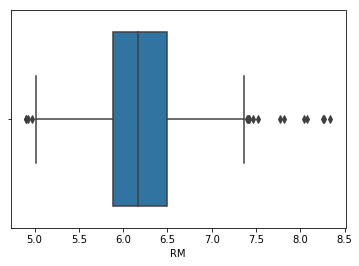

In [22]:
sns.boxplot(x=boston_df_out['RM'])

In [23]:
boston_df_out.shape

(321, 14)

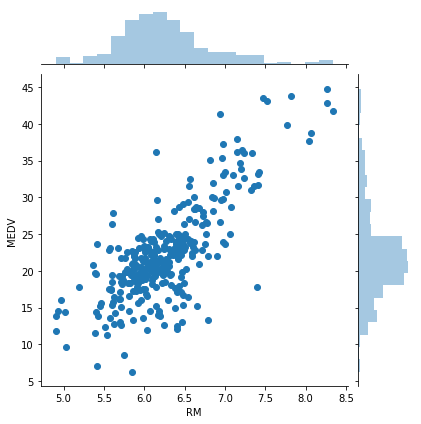

In [24]:
sns.jointplot(x='RM', y='MEDV', data=boston_df_out)



In [25]:
r = sc.stats.linregress(boston_df_out['RM'], boston_df_out['MEDV']).rvalue
print(f'The measure R^2 is {r*r}')

The measure R^2 is 0.5901331396336383


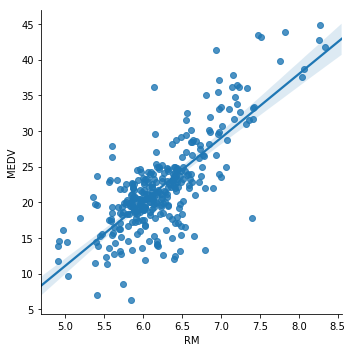

In [26]:
sns.lmplot(x='RM', y='MEDV', data=boston_df_out)


# Both
Qué pasa si quito tanto los outliers de uno como los de otro?

In [27]:
boston_df_o1 = boston_df_o.copy()

Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
threshold_IQR = 2.5
boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - threshold_IQR * IQR)) |(boston_df_o1 > (Q3 + threshold_IQR * IQR))).any(axis=1)]

CRIM         2.07111
ZN          12.50000
INDUS       12.97000
CHAS         0.00000
NOX          0.16000
RM           0.67350
AGE         50.15000
DIS          3.08410
RAD          4.00000
TAX        158.00000
PTRATIO      2.80000
B           19.02000
LSTAT        9.00500
MEDV         7.25000
dtype: float64


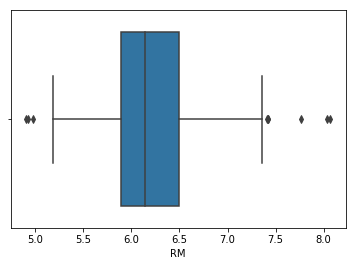

In [28]:
sns.boxplot(x=boston_df_out['RM'])

In [29]:
r = sc.stats.linregress(boston_df_out['RM'], boston_df_out['MEDV']).rvalue
print(f'The measure R^2 is {r*r}')

The measure R^2 is 0.630922598837628
